In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TolColors import tol_cmap # for better visualizations
cmap = tol_cmap('rainbow_PuRd')

# Some cosmetic updates
import matplotlib 
matplotlib.rcParams.update({'xtick.labelsize':18,
                            'ytick.labelsize':18,
                            'axes.titlesize':18,
                            'axes.labelsize':18,
                            'font.size':18,
                            'xtick.top':True,
                            'xtick.minor.visible':True,
                            'ytick.minor.visible':True,
                            'xtick.major.size':4,
                            'xtick.minor.size':1.5,
                            'ytick.major.size':4,
                            'ytick.minor.size':1.5,
                            'ytick.right':True,
                            'xtick.direction':'in',
                            'ytick.direction':'in',
                            'font.family':'serif',
                            'lines.markersize': 10,
                            'image.cmap': cmap})

In [2]:
### scikit-learn's SVM implementation: SVC ###
from sklearn.svm import SVC 

## Create classes of clustered points
Data needs to be of form: \
`X`: a variable containing the measurable parameters for each point; has shape (n_samples, n_features) \
`y`: a variable containing the class for each data point (think: the auxillary axis of a scatter plot);
    has shape (n_points)

In [3]:
### Generate example dataset ###
# np.random.seed(1)
N_A = 10
N_B = N_A 

mu_A = np.array([1.0, 1.0])
mu_B = np.array([2.0, 2.0])
## X1 and X2 means for our two distributions

cov_A = np.array([[1, -0.5], 
                 [-0.5, 1]]) 
cov_B = cov_A 
## covariance matrices for random sampled gaussians

X_A = np.random.multivariate_normal(mu_A, cov_A, N_A)
X_B = np.random.multivariate_normal(mu_B, cov_B, N_B)
## Generates N two-dimensional random samples centered at [1,1] and [2,2] respectively

X = np.vstack([X_A, X_B])
## X has shape (N_samples, N_features), where N_samples = N_A + N_B 

y = np.hstack([np.zeros(N_A), np.ones(N_B)])
## y = 0 corresponds to the X1 distribution
## y = 1 corresponds to the X2 distribution

print('X shape:', X.shape)
print('y shape:', y.shape)

## TRY PRINTING X AND Y TO MAKE SURE THEY MAKE SENSE

X shape: (20, 2)
y shape: (20,)


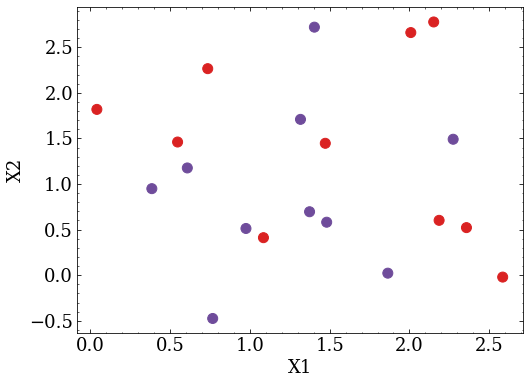

In [4]:
### Plot the input dataset, using data class as the color ### 
fig, ax = plt.subplots(figsize = (8,6))

## Every X variable has shape (N_points, 2), so access as X[:, column] for column = {0, 1}

## Recommend that you use either
ax.scatter(X[:,0], X[:,1], c = y) # plots X as axes, with y as color 
## or 
# ax.scatter(X_A[:, 0], X_A[:,1], label = 'A')
# ax.scatter(X_B[:, 0], X_B[:, 1], label = 'B') # plots X_A and X_B as separate classes
# ax.legend()

ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

## Fit SVM:
We'll teach `sklearn.svm`'s SVC (C-Support Vector Classification) to classify our data. More information about scikit-learn's SVM implementations can be found [here](https://scikit-learn.org/stable/modules/svm.html#svm-classification).

The `SVC` class can be initialized by name, and then fit to the data using its built-in `fit()` function.

In [5]:
model = SVC(kernel = 'linear') ## creates a new SVC model 
model.fit(X, y) ## fit to generated data

SVC(kernel='linear')

Once fit, we can access a few useful model attributes
+ `svm.support_vectors_`: gives the 'support vectors', the nearest data that were used to define the hyperplane
+ `svm.support_`: gives indices of the suppport vectors
+ `svm.coef_`: gives the weights of the classifier - for a linear classifier, corresponds to weight of X1 and X2
+ `svm.intercept_`: gives the unweighted intercept of the hyperplane 

In [6]:
## Try printing off the model's support vectors - what do these correspond to?
support_vecs = model.support_vectors_
print(support_vecs)

[[ 1.31701806  1.70839576]
 [ 1.86438997  0.0226233 ]
 [ 1.4811909   0.58112066]
 [ 2.27398566  1.4904853 ]
 [ 0.97522183  0.51252444]
 [ 0.60770525  1.17586048]
 [ 1.40417596  2.71913749]
 [ 1.37392107  0.69587883]
 [ 0.38530528  0.94900994]
 [ 1.08489937  0.41163682]
 [ 0.54670809  1.46009711]
 [ 2.35734203  0.5218304 ]
 [ 2.00850641  2.65983284]
 [ 2.18592169  0.60160626]
 [ 0.73563538  2.26424457]
 [ 0.0407526   1.81771622]
 [ 2.58438614 -0.02043601]
 [ 1.47254512  1.44604807]]


In [7]:
### Calculate the "hyperplane" between the two classes of data ###
w = model.coef_[0]
m = - w[0] / w[1] ## slope of the line derived from the weights of the classifier
b = - model.intercept_[0] / w[1] ## y intercept of hyperplane, weighted 

xx = np.linspace(0.8 * np.min(X[:,0]), 1.2 * np.max(X[:,0]))
yy = m * xx + b ## this should be the line that best separates the two classes

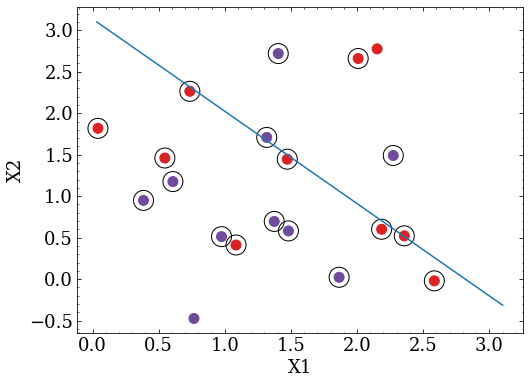

In [8]:
### Plot the hyperplane separating these two classes ###
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(X[:,0], X[:,1], c = y)

## TRY PLOTTING THE SUPPORT VECTOR POINTS AS WELL
ax.scatter(support_vecs[:,0], support_vecs[:,1], 
           s = 400, facecolors = 'none', edgecolors = 'k') #cosmetics

## Plot the hyperplane separating the two classes
ax.plot(xx, yy)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

What do you notice about the fit?

## SVM Predictions
Now, we can use `SVC.predict(X)` to predict the labels for an unclassified input dataset

In [9]:
### Generate some gaussian unlabeled input data, centered on [1.5, 1.5] ###
N = 500
X_ = np.random.multivariate_normal([1.5,1.5], np.eye(2), N)

y_ = model.predict(X_)

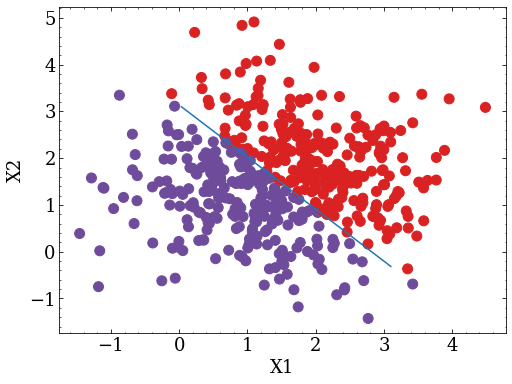

In [10]:
fig, ax = plt.subplots(figsize = (8,6))
## SCATTER PLOT THE INPUT DATA WITH y_ AS THE COLOR  
ax.scatter(X_[:,0], X_[:,1], c = y_)
ax.plot(xx, yy)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# SVMs with nonlinear data
## Create non-linearly-separable datapoints

In [11]:
### Generate X and y arrays for a more complicated dataset ###

N_A = 100
N_B = N_A
cov = np.array([[1,0],[0,1]]) # spherical covariance

X_A = np.random.multivariate_normal([0,0], cov, N_A)
# Generates a two-dimensional, homoscedastic gaussian sample

X_B = np.random.multivariate_normal([0,0], cov, N_B) 
r = 2
mag = np.sqrt(X_B[:, 0]**2 + X_B[:, 1]**2)
cos_sin = np.divide(X_B, np.vstack([mag, mag]).T) # calculates cos and sin of random positions
X_B = X_B + r * cos_sin
# Generates a random disk sample by transforming a two-dimensional gaussian sample to
# the parametrized circle (x + r * cos(theta), y + r * sin(theta))

X = np.vstack([X_A, X_B])
# X has shape (2 * N_samples, N_features)

y = np.hstack([np.zeros(N_A), np.ones(N_B)])
# Generate labels for each population

In [12]:
# Try printing the data or using array.shape to understand their dimensions

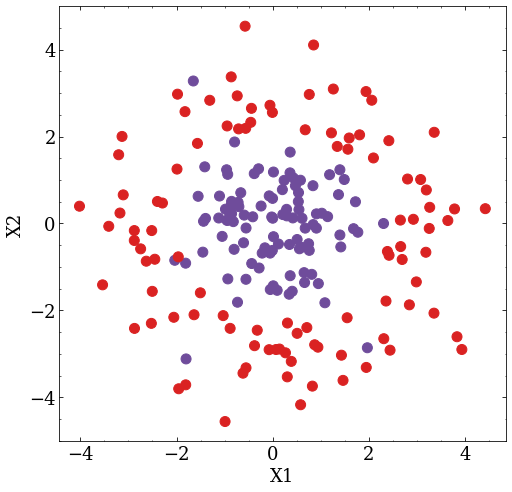

In [13]:
### Plot the datapoints ###
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(X[:,0], X[:,1], c = y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

These datapoints are obviously not linearly seaparable! Let's see what SVM makes of this with different approaches...

## Kernels:
SVM classifiers can use other "kernels" besides linear hyperplanes to fit data of different shapes
+ Linear kernel: $\langle x, x \prime \rangle$ - the most straightforward kernel; use with `kernel = 'linear'`
+ Gaussian (or Radial Basis Function) kernel: $\exp(-\gamma \vert \vert x_i - x_i \prime ||^2)$ for some $\gamma$; use with `kernel = 'rbf'`
+ Polynomial: $(\gamma \langle x, x\prime \rangle + r)^2$ for some $\gamma, d$; use with `kernel = 'poly'`

In [14]:
model = SVC(kernel = 'rbf') # TRY SWITCHING TO A BETTER KERNEL - E.G. kernel = 'rbf'
model.fit(X, y)

SVC()

It's now a lot harder to parametrize this boundary now that it's nonlinear, so we instead fit our model to a grid in the (X1, X2) plane and then calculate the boundaries

In [16]:
### Get the classifier boundaries from model prediction ###
xx1, xx2 = np.meshgrid(np.linspace(-4,4,1000), 
                    np.linspace(-4,4,1000))

xx = np.vstack([xx1.ravel(), xx2.ravel()]).T ## gets a grid of points with the same shape as X
yy = model.predict(xx)
yy = yy.reshape(xx1.shape) ## for plotting

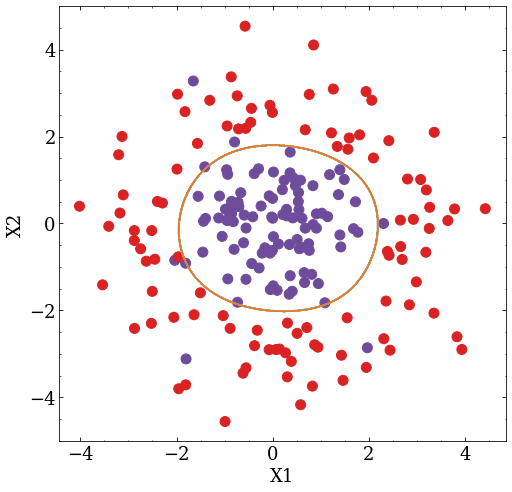

In [17]:
### Plot the datapoints ###
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(X[:,0], X[:,1], c = y)
ax.contour(xx1, xx2, yy)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

In [17]:
# If you want to, you can try generating a new random sample and use the model.predict() to classify it!

# Outside Resources
+ For SVM classification with larger numbers of classes and kernel types, check out [the graphic interface provided by `libsvm`](https://www.csie.ntu.edu.tw/~cjlin/libsvm/).

+ The libsvm team also wrote a very good [beginner's guide to parametric svm](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf).

+ The [scikit-learn SVM overview](https://scikit-learn.org/stable/modules/svm.html#svm-classification) has a lot of information about how to use their various models, as well as the mathematical formulation behind them.